In [ ]:
# IMPORT AND MERGE THE DATA

In [1]:
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [4]:
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings
0,abdelal01,2844000
1,abdulka01,8560000
2,abdulma02,19849500
3,abdulta01,37982800
4,abdursh01,95866000


In [5]:
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764


# AVERAGE EARNINGS BY BIRTH COUNTRY AND BIRTH CITY

In [6]:
countries = full_data.groupby("Birth State/Country")
top_countries = countries["Total Earnings"].mean().sort_values(ascending=False)[:20]
display(top_countries.head())

Birth State/Country
 U.S. VirgIslands         2.434717e+08
 South Africa             1.469366e+08
 South Dakota             9.317691e+07
 Republic of the Congo    7.512739e+07
 Argentina                7.230628e+07
Name: Total Earnings, dtype: float64

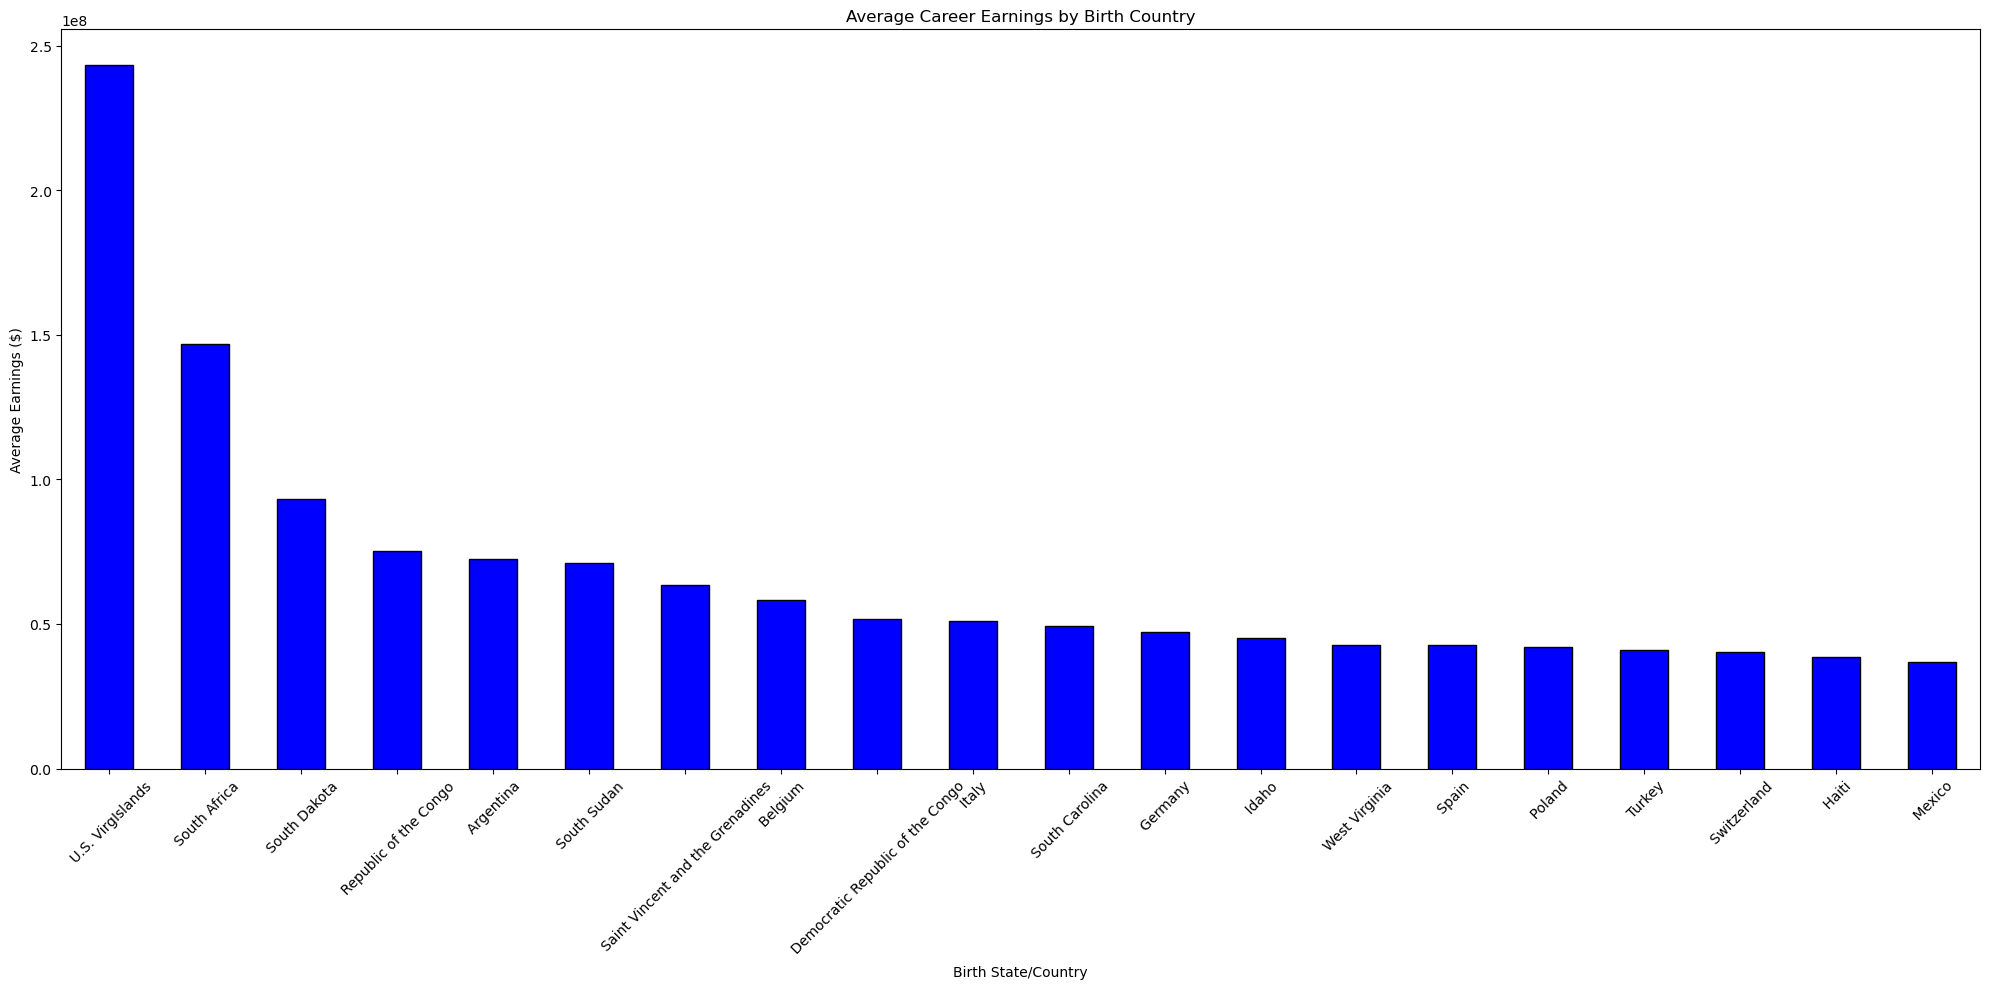

In [7]:
plt.figure(figsize=(20, 10))
top_countries.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Career Earnings by Birth Country')
plt.xlabel('Birth State/Country')
plt.ylabel('Average Earnings ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
countries = full_data.groupby("Birth State/Country")
top_countries = countries["Total Earnings"].mean().sort_values(ascending=False)
display(top_countries.head())

Birth State/Country
 U.S. VirgIslands         2.434717e+08
 South Africa             1.469366e+08
 South Dakota             9.317691e+07
 Republic of the Congo    7.512739e+07
 Argentina                7.230628e+07
Name: Total Earnings, dtype: float64

In [9]:
cities = full_data.groupby("Birth City")
top_cities = cities["Total Earnings"].mean().sort_values(ascending=False)[:20]
display(top_cities.head(20))

Birth City
Mauldin            343872398.0
Wurzburg           250371801.0
St. Croix          243471655.0
Merced             184356410.0
Hanford            173496273.0
Cortlandt Manor    169229324.0
Columbia           168794021.0
Barcelona          167137441.5
Bruges             163282460.0
Pineville          155332815.0
Johannesburg       146936620.0
Parkersburg        146573189.0
Aschaffenburg      146109736.0
Waukegan           134936762.0
Puerto Plata       131799522.0
Sao Carlos         129124129.0
Bahia Blanca       127539615.0
Monroe             123451301.0
Marion             119604791.0
Key West           119000123.0
Name: Total Earnings, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

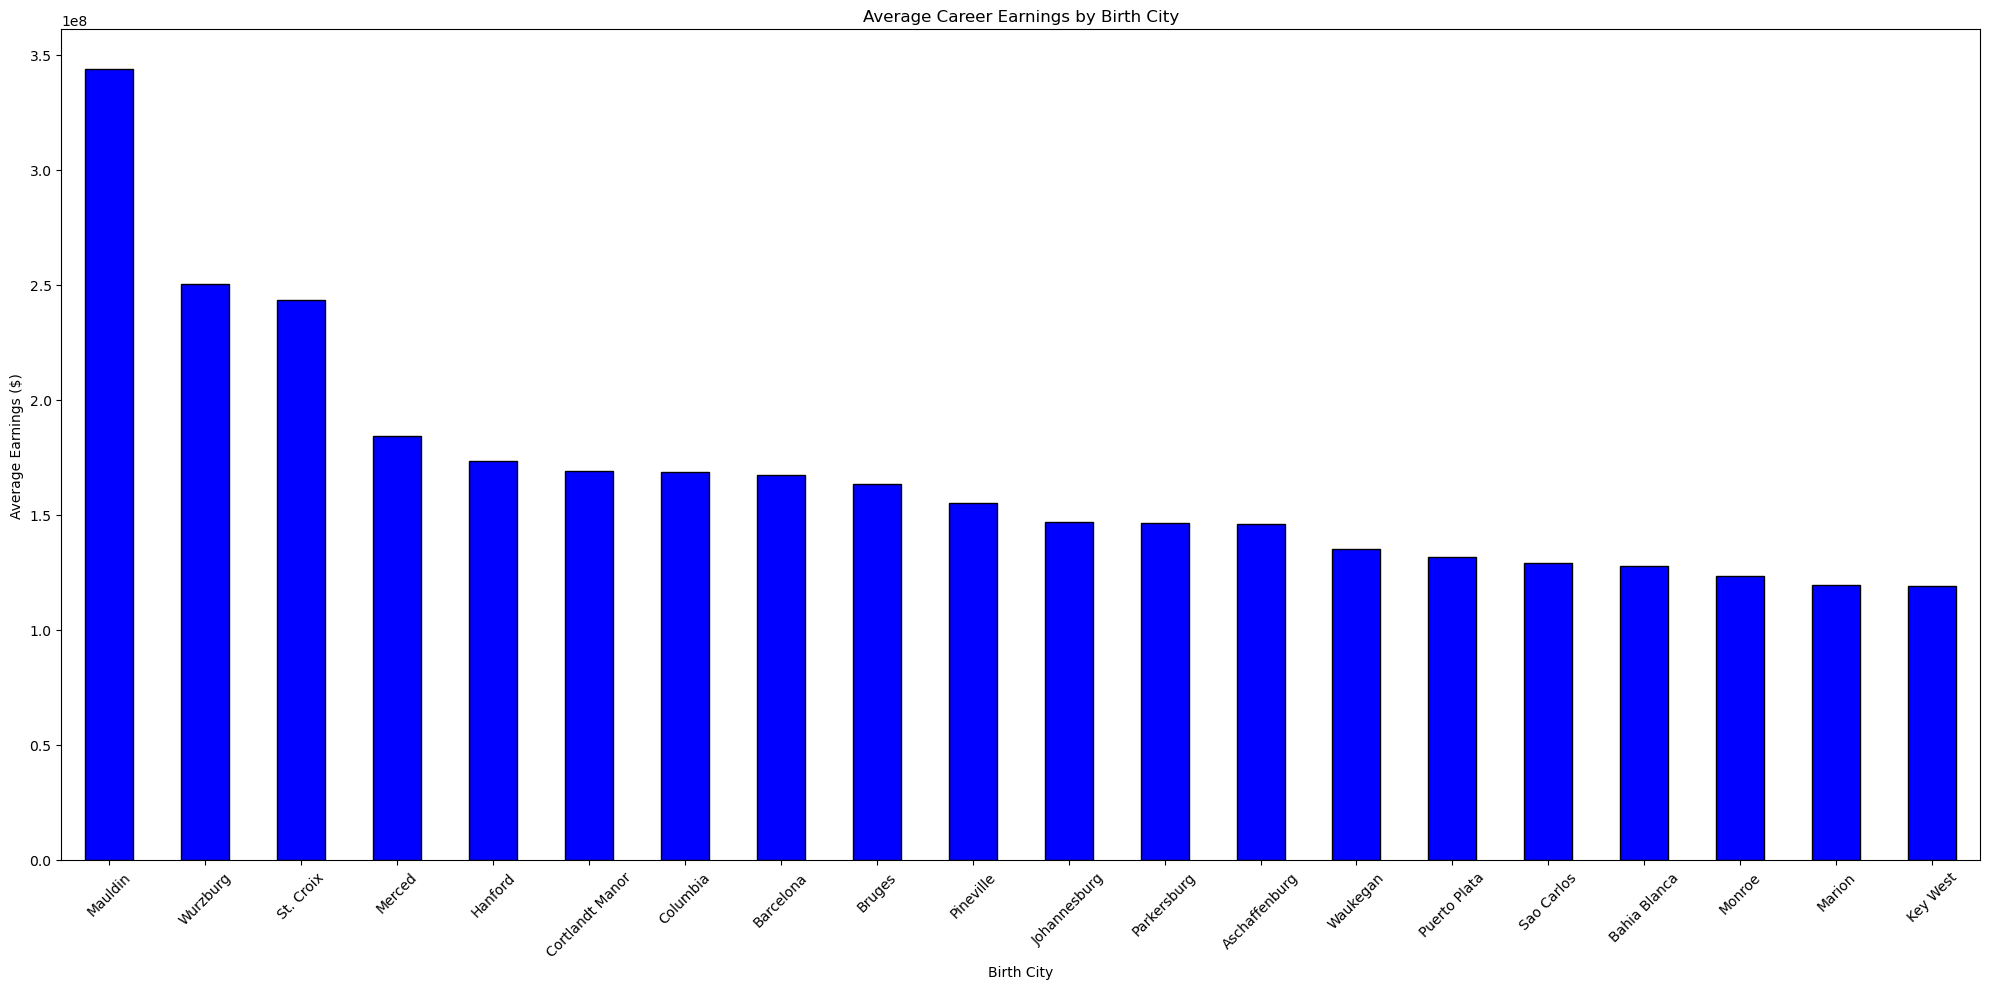

In [10]:
plt.figure(figsize=(20, 10))
top_cities.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Career Earnings by Birth City')
plt.xlabel('Birth City')
plt.ylabel('Average Earnings ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

# TOTAL EARNINGS BY BIRTH COUNTRY AND BIRTH CITY

In [11]:
countries_total = full_data.groupby("Birth State/Country")
top_countries_total = countries_total ["Total Earnings"].sum().sort_values(ascending=False)[:20]
display(top_countries_total.head())

Birth State/Country
 California      4508537901
 New York        2434134743
 Illinois        2306184625
 Texas           1729460874
 Pennsylvania    1678558835
Name: Total Earnings, dtype: int64

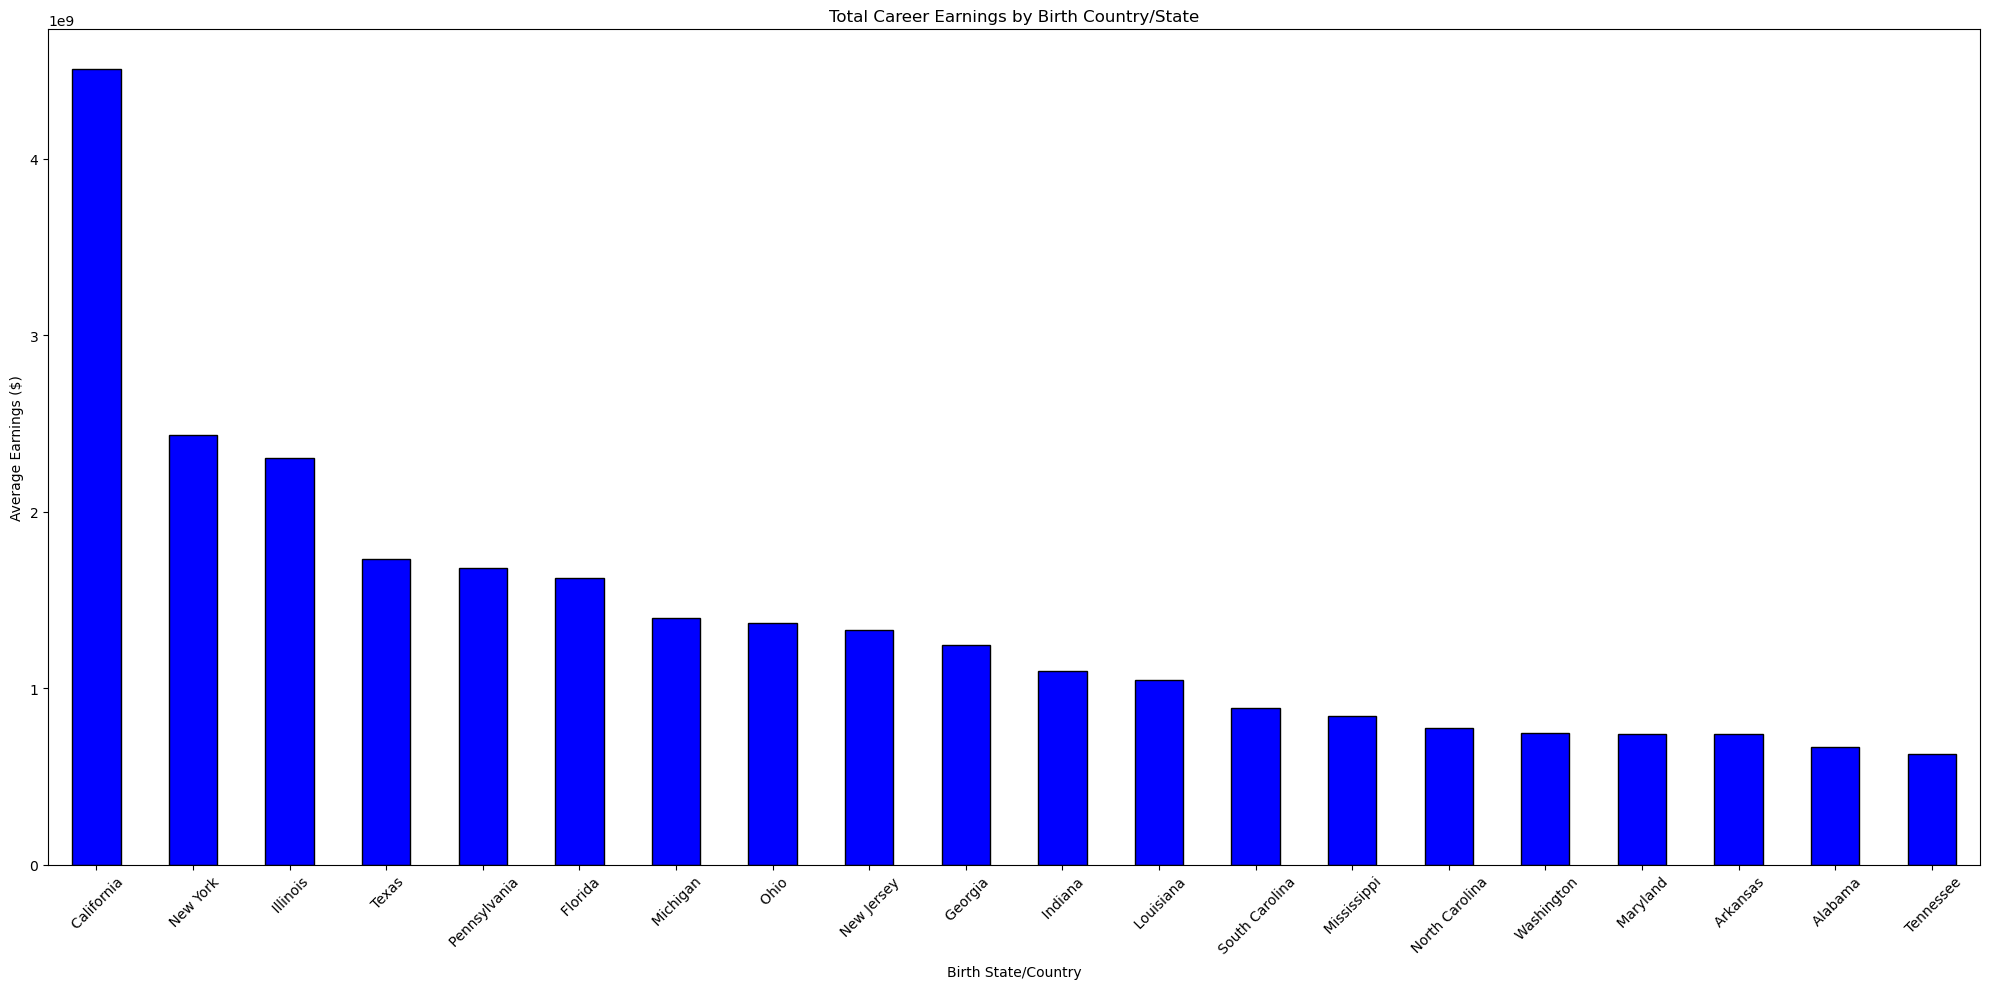

In [12]:
plt.figure(figsize=(20, 10))
top_countries_total.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total Career Earnings by Birth Country/State')
plt.xlabel('Birth State/Country')
plt.ylabel('Average Earnings ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
cities_total = full_data.groupby("Birth City")
top_cities_total =cities_total ["Total Earnings"].sum().sort_values(ascending=False)[:20]
display(top_cities_total.head())

Birth City
Chicago         1278814791
Philadelphia    1187554954
Los Angeles     1177600910
Dallas           800154191
Oakland          615842609
Name: Total Earnings, dtype: int64

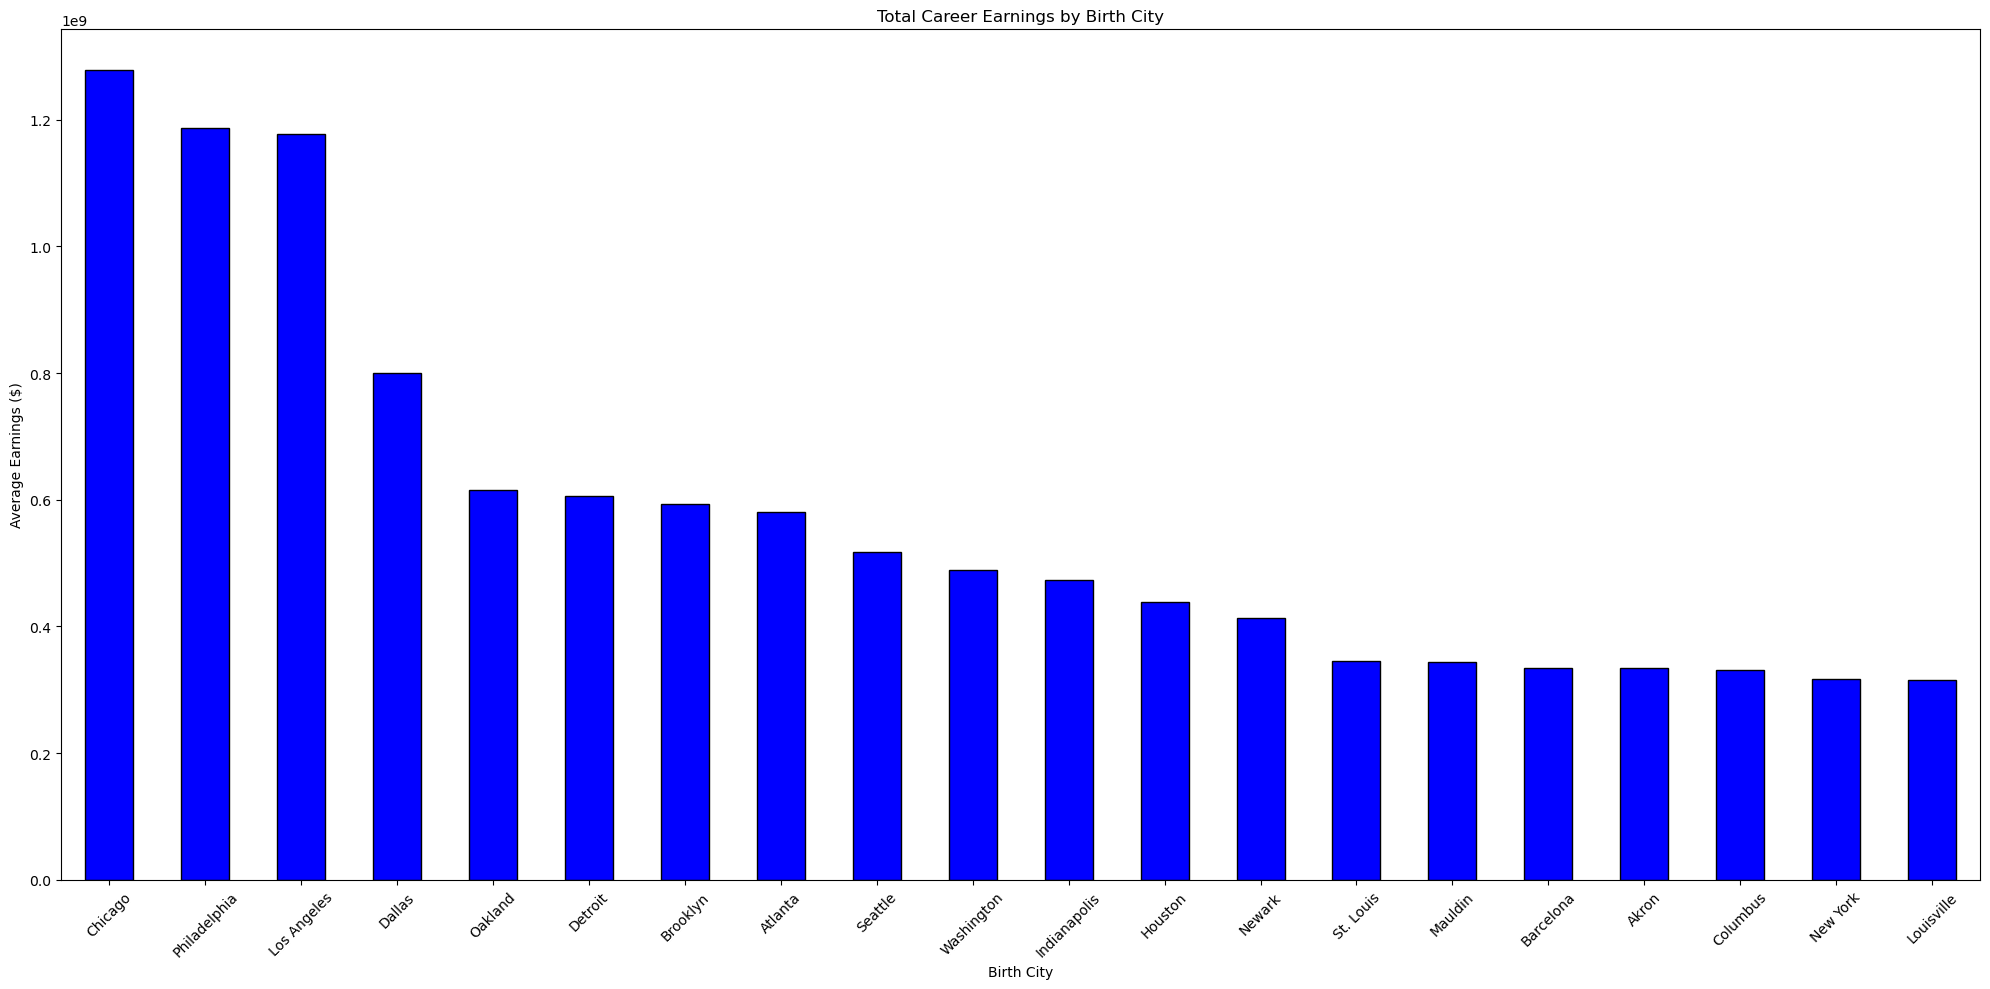

In [14]:
plt.figure(figsize=(20, 10))
top_cities_total.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total Career Earnings by Birth City')
plt.xlabel('Birth City')
plt.ylabel('Average Earnings ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MOST NBA PLAYERS BY BIRTH COUNTRY AND CITY 

In [15]:
players = full_data.groupby("Birth State/Country")
total_players = players["_id"].count().sort_values(ascending=False)[:20]
display(total_players.head())

Birth State/Country
 California    170
 New York       98
 Illinois       78
 Texas          60
 Georgia        57
Name: _id, dtype: int64

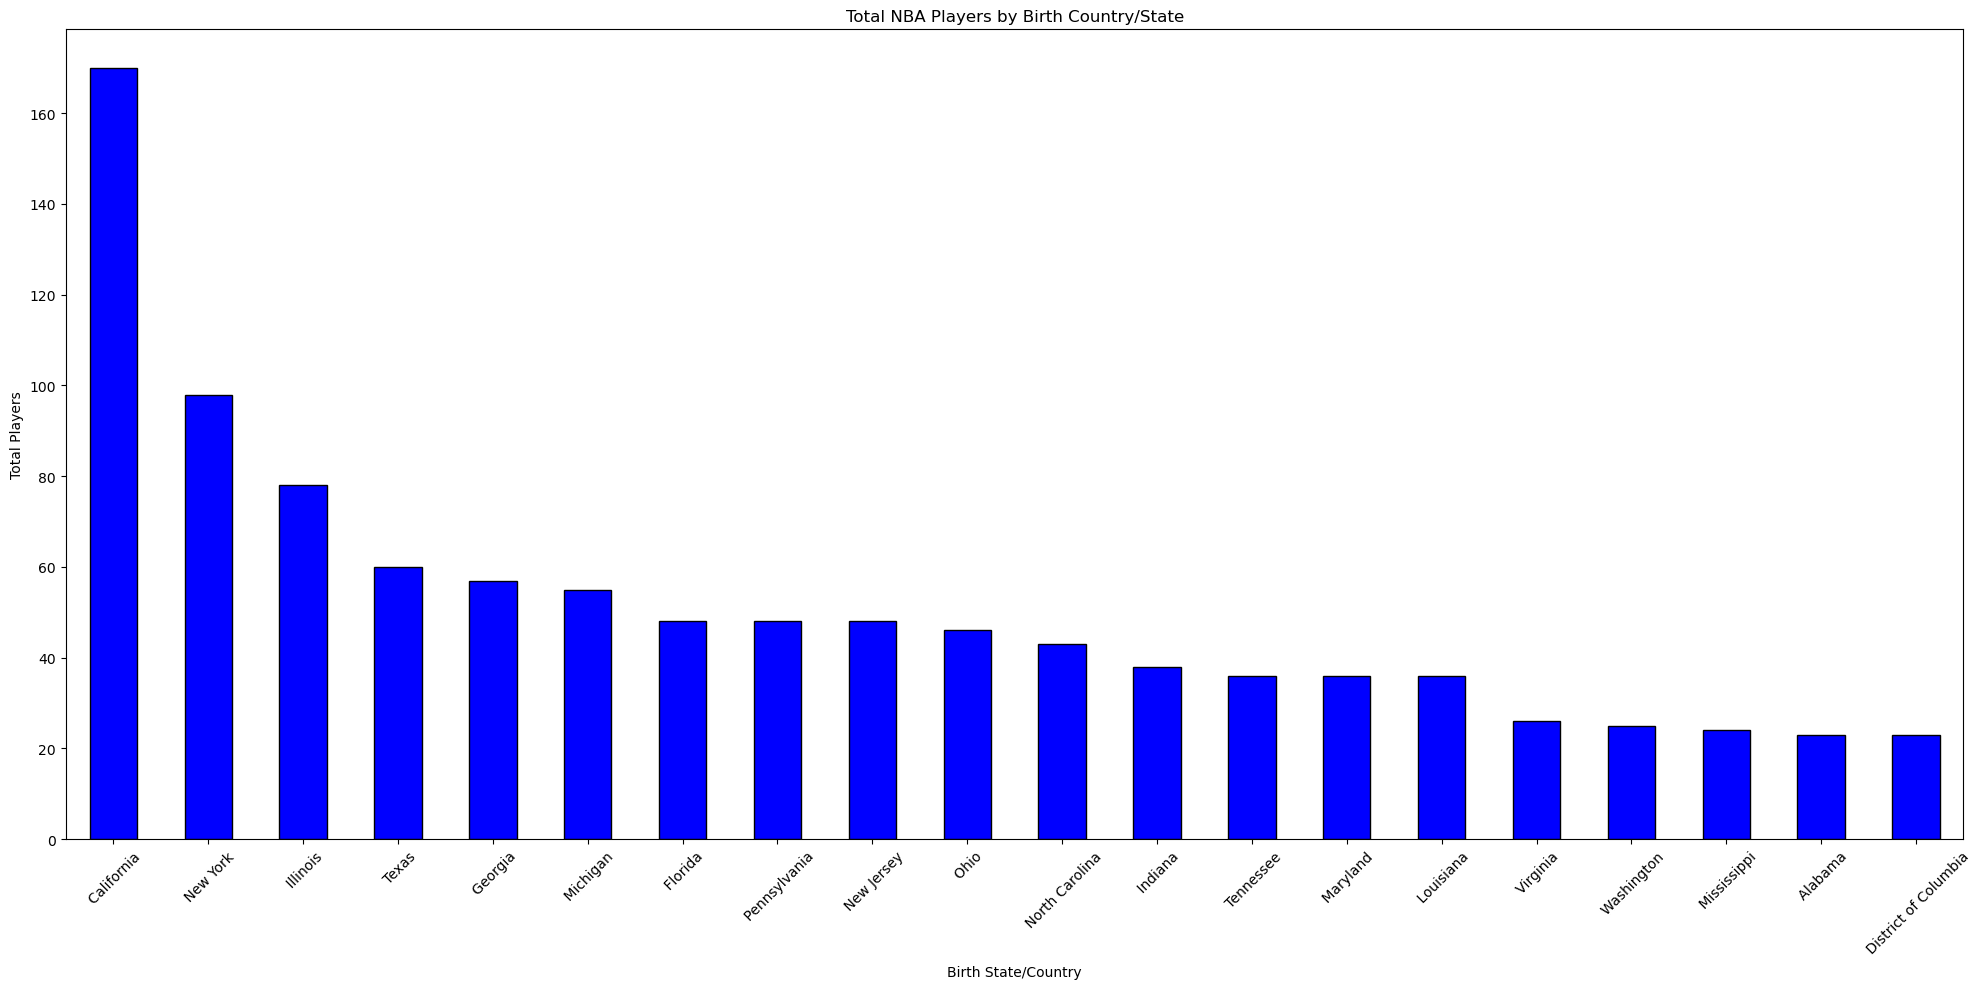

In [16]:
plt.figure(figsize=(20, 10))
total_players.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total NBA Players by Birth Country/State')
plt.xlabel('Birth State/Country')
plt.ylabel('Total Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
players = full_data.groupby("Birth City")
total_players = players["_id"].count().sort_values(ascending=False)[:20]
display(total_players.head())

Birth City
Los Angeles     49
Chicago         37
Philadelphia    30
Washington      26
Detroit         26
Name: _id, dtype: int64

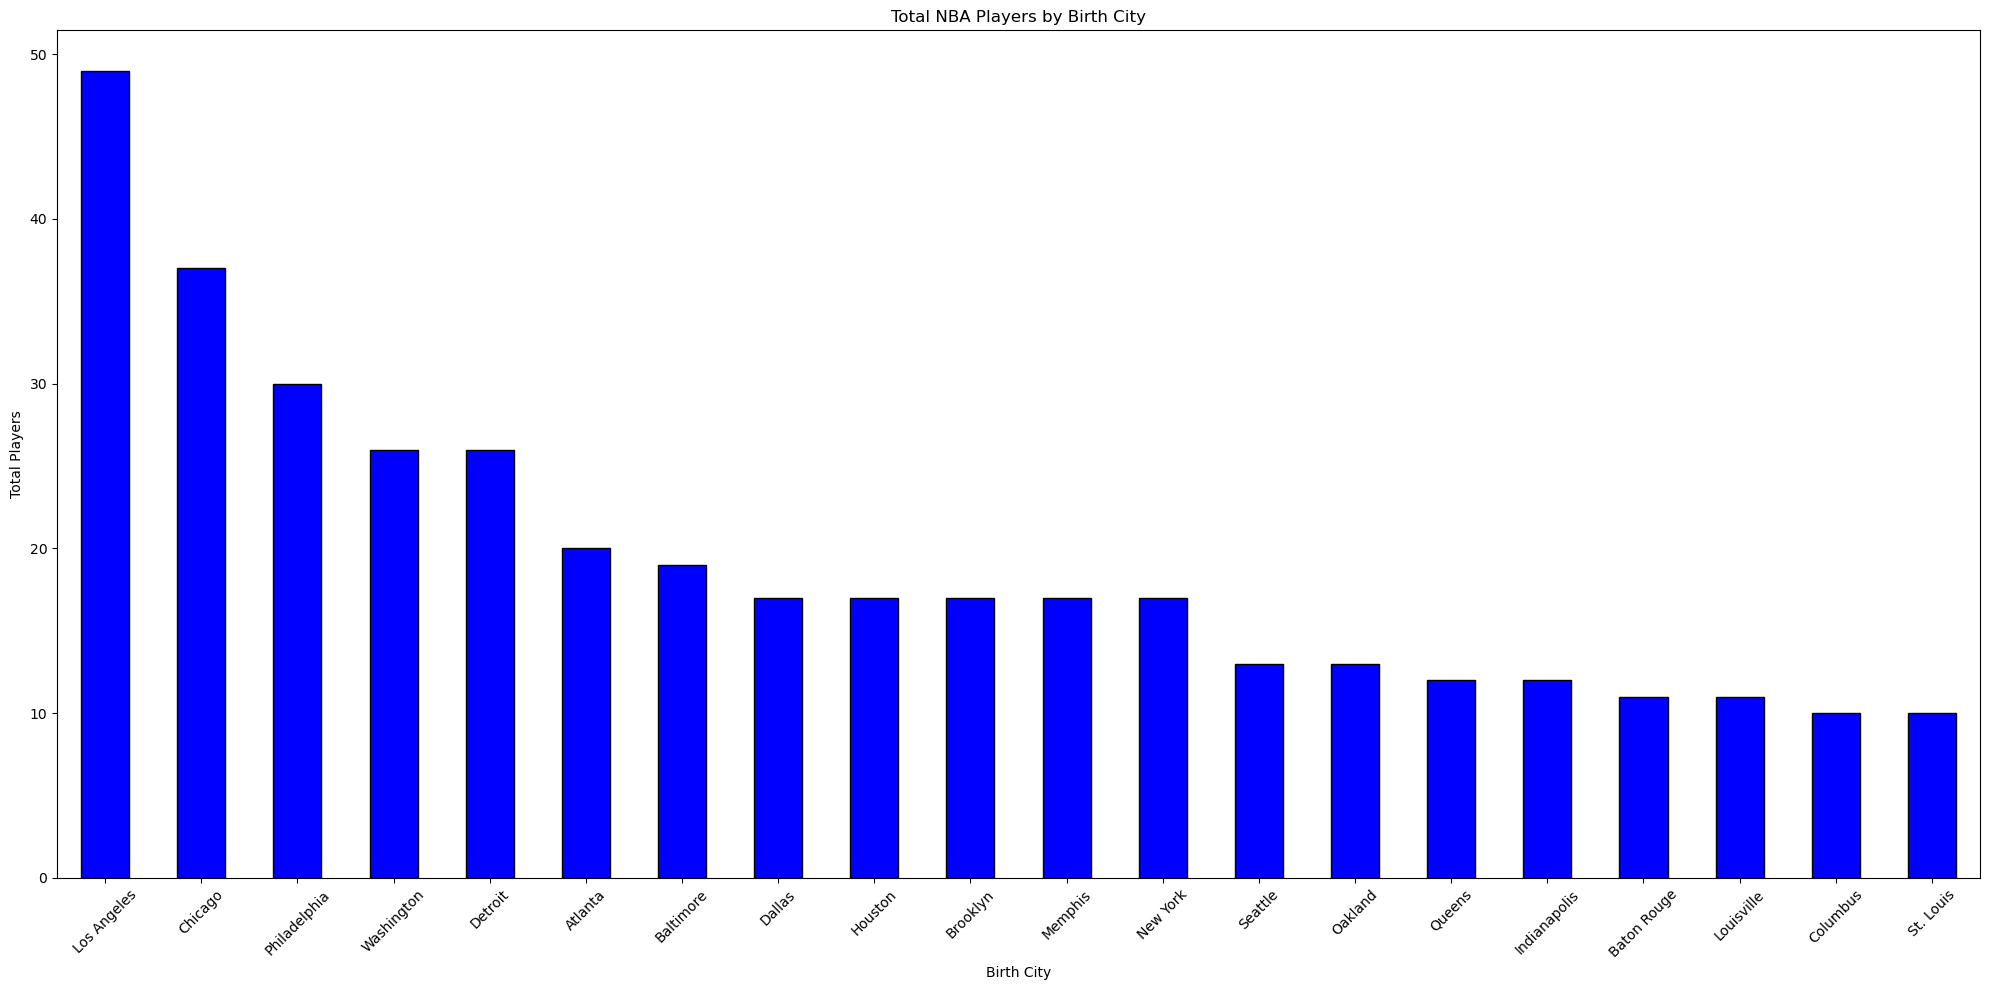

In [18]:
plt.figure(figsize=(20, 10))
total_players.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total NBA Players by Birth City')
plt.xlabel('Birth City')
plt.ylabel('Total Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# BIRTH COUNTRY AND CITY THAT PRODUCE THE BEST NBA PLAYERS STATISTICALLY 

In [19]:
points_by_country = full_data.groupby("Birth State/Country")
total_points_by_country = points_by_country["Total Career Points"].sum().sort_values(ascending=False)[:20]
display(total_points_by_country.head())

Birth State/Country
 California      684660
 New York        375047
 Illinois        355588
 Pennsylvania    256367
 Florida         247283
Name: Total Career Points, dtype: int64

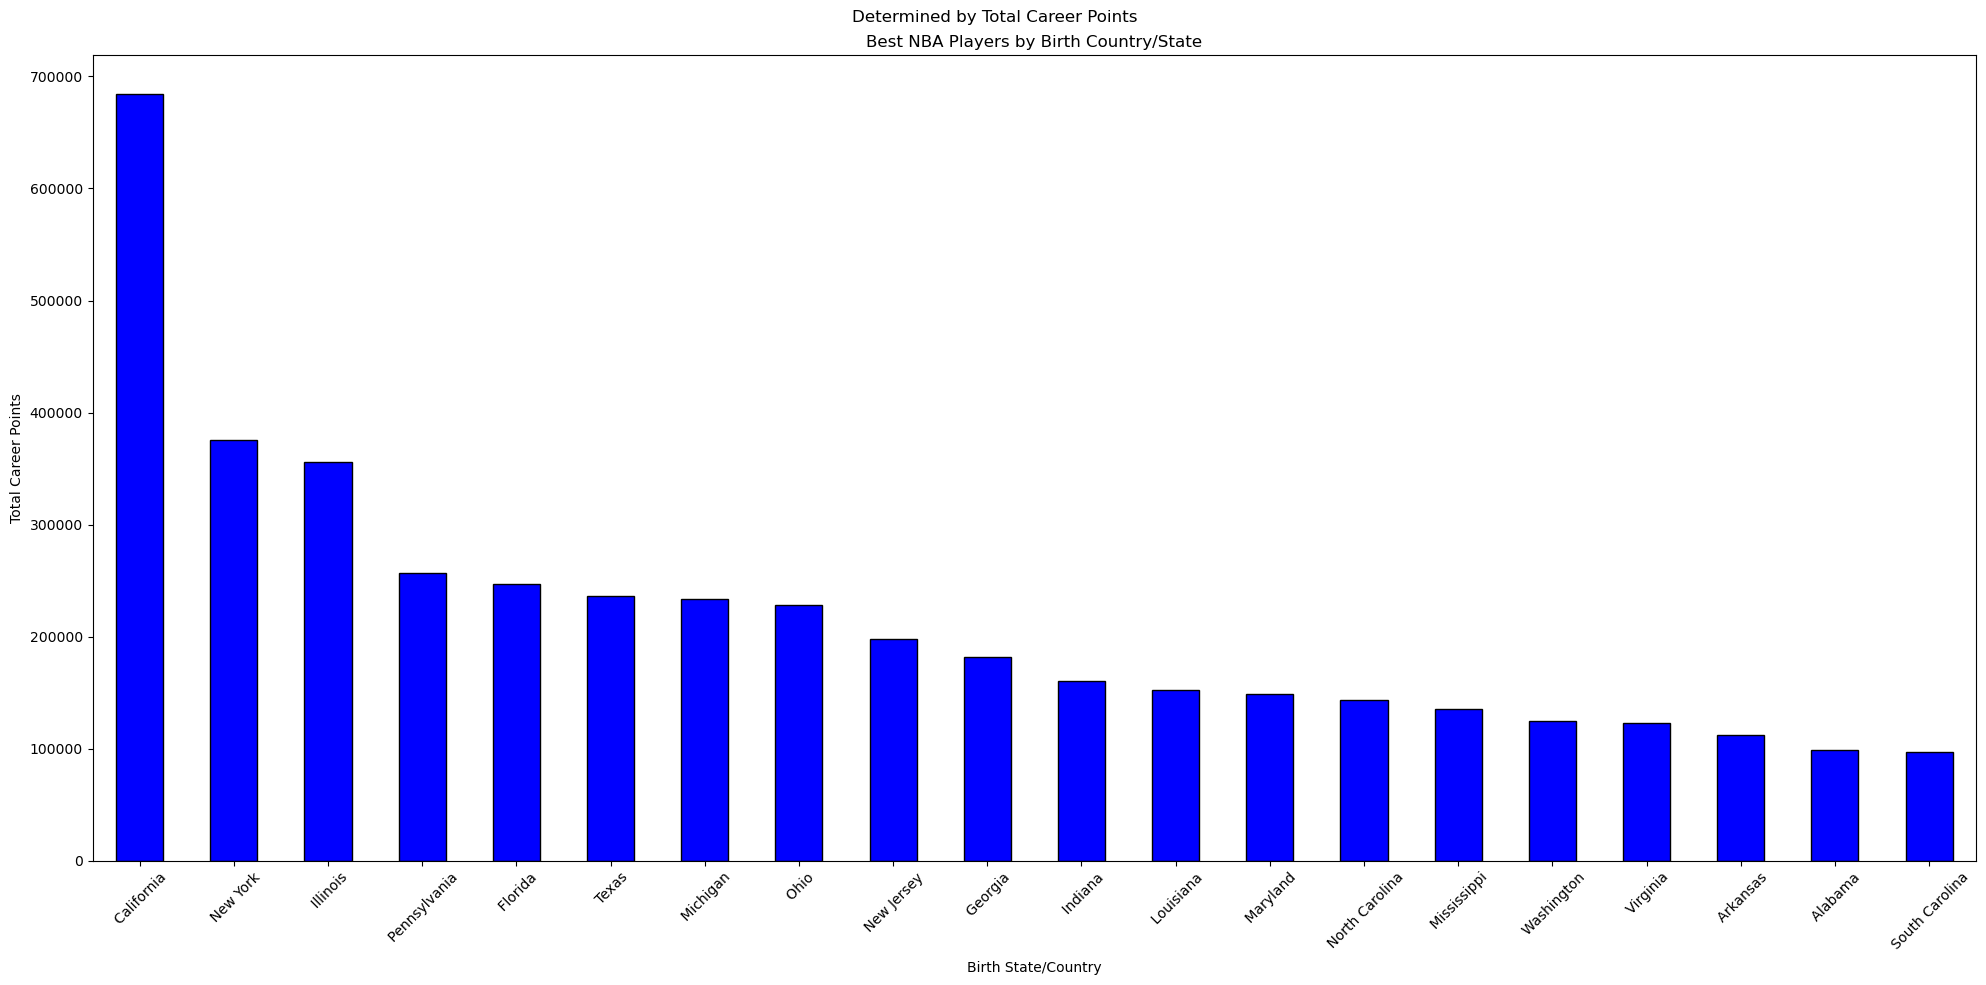

In [20]:
plt.figure(figsize=(20, 10))
total_points_by_country.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Best NBA Players by Birth Country/State')
plt.suptitle('Determined by Total Career Points')
plt.xlabel('Birth State/Country')
plt.ylabel('Total Career Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
points_by_city = full_data.groupby("Birth City")
total_points_by_city = points_by_city["Total Career Points"].sum().sort_values(ascending=False)[:20]
display(total_points_by_city.head())

Birth City
Chicago         198936
Los Angeles     180247
Philadelphia    163933
Oakland         104393
Detroit          98336
Name: Total Career Points, dtype: int64

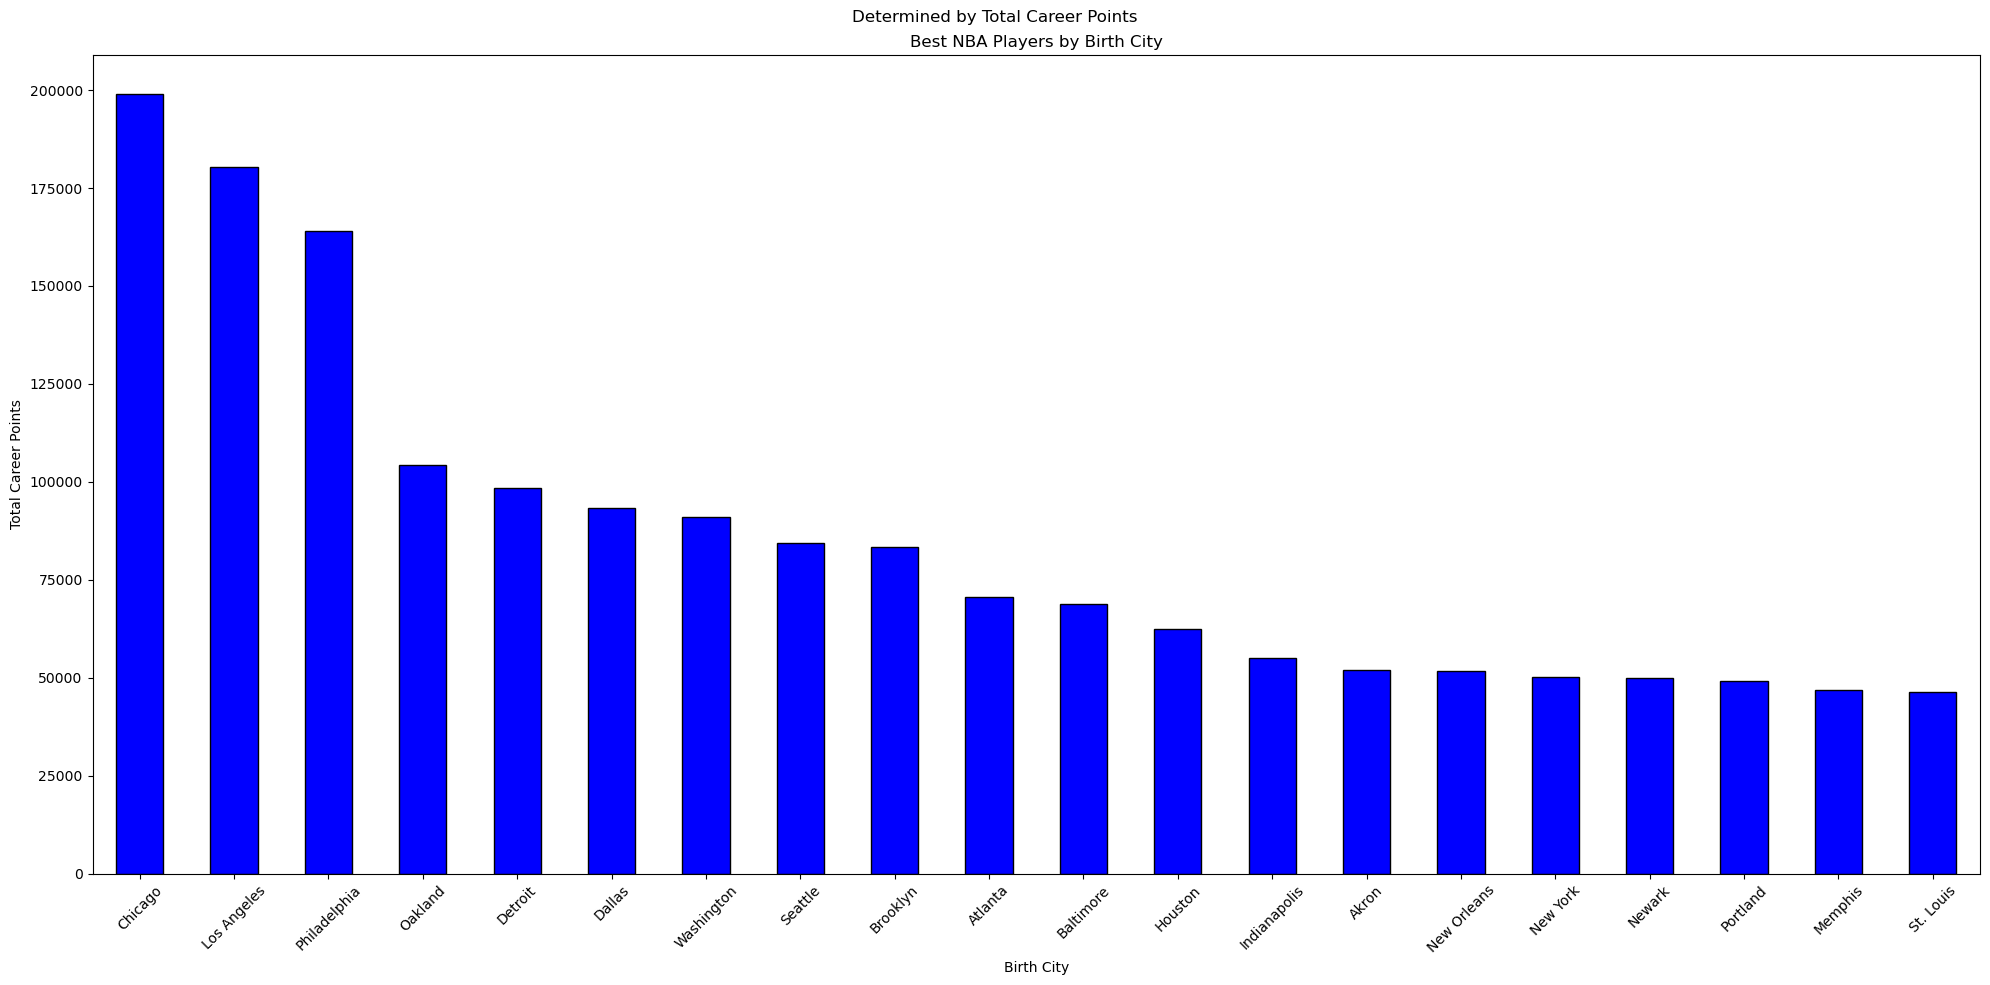

In [22]:
plt.figure(figsize=(20, 10))
total_points_by_city.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Best NBA Players by Birth City')
plt.suptitle('Determined by Total Career Points')
plt.xlabel('Birth City')
plt.ylabel('Total Career Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
games_by_country = full_data.groupby("Birth State/Country")
total_games_by_country = games_by_country["Career Games Played"].sum().sort_values(ascending=False)[:20]
display(total_games_by_country.head())

Birth State/Country
 California      67915
 New York        35680
 Illinois        32072
 Texas           23662
 Pennsylvania    22919
Name: Career Games Played, dtype: int64

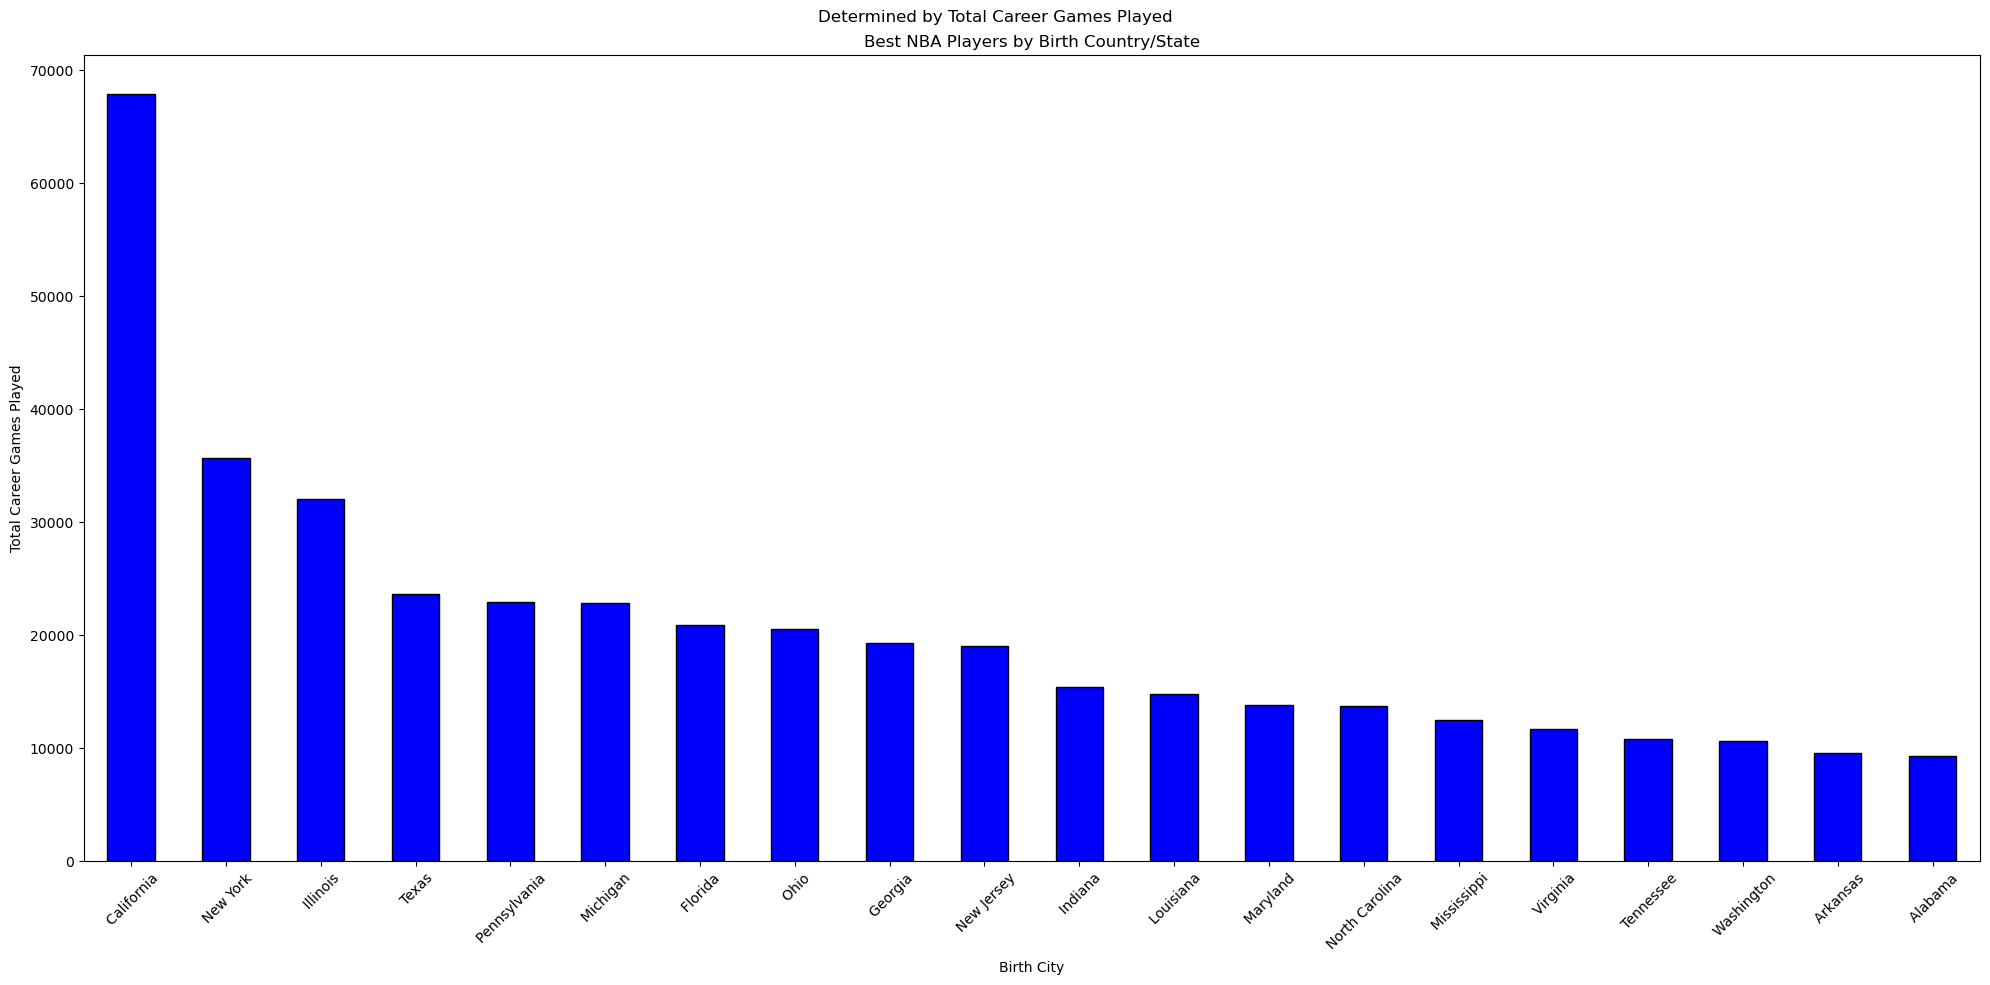

In [24]:
plt.figure(figsize=(20, 10))
total_games_by_country.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Best NBA Players by Birth Country/State')
plt.suptitle('Determined by Total Career Games Played')
plt.xlabel('Birth City')
plt.ylabel('Total Career Games Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
games_by_city = full_data.groupby("Birth City")
total_games_by_city = games_by_city["Career Games Played"].sum().sort_values(ascending=False)[:20]
display(total_games_by_city.head())

Birth City
Los Angeles     18485
Chicago         16616
Philadelphia    14518
Detroit         10178
Washington       9770
Name: Career Games Played, dtype: int64

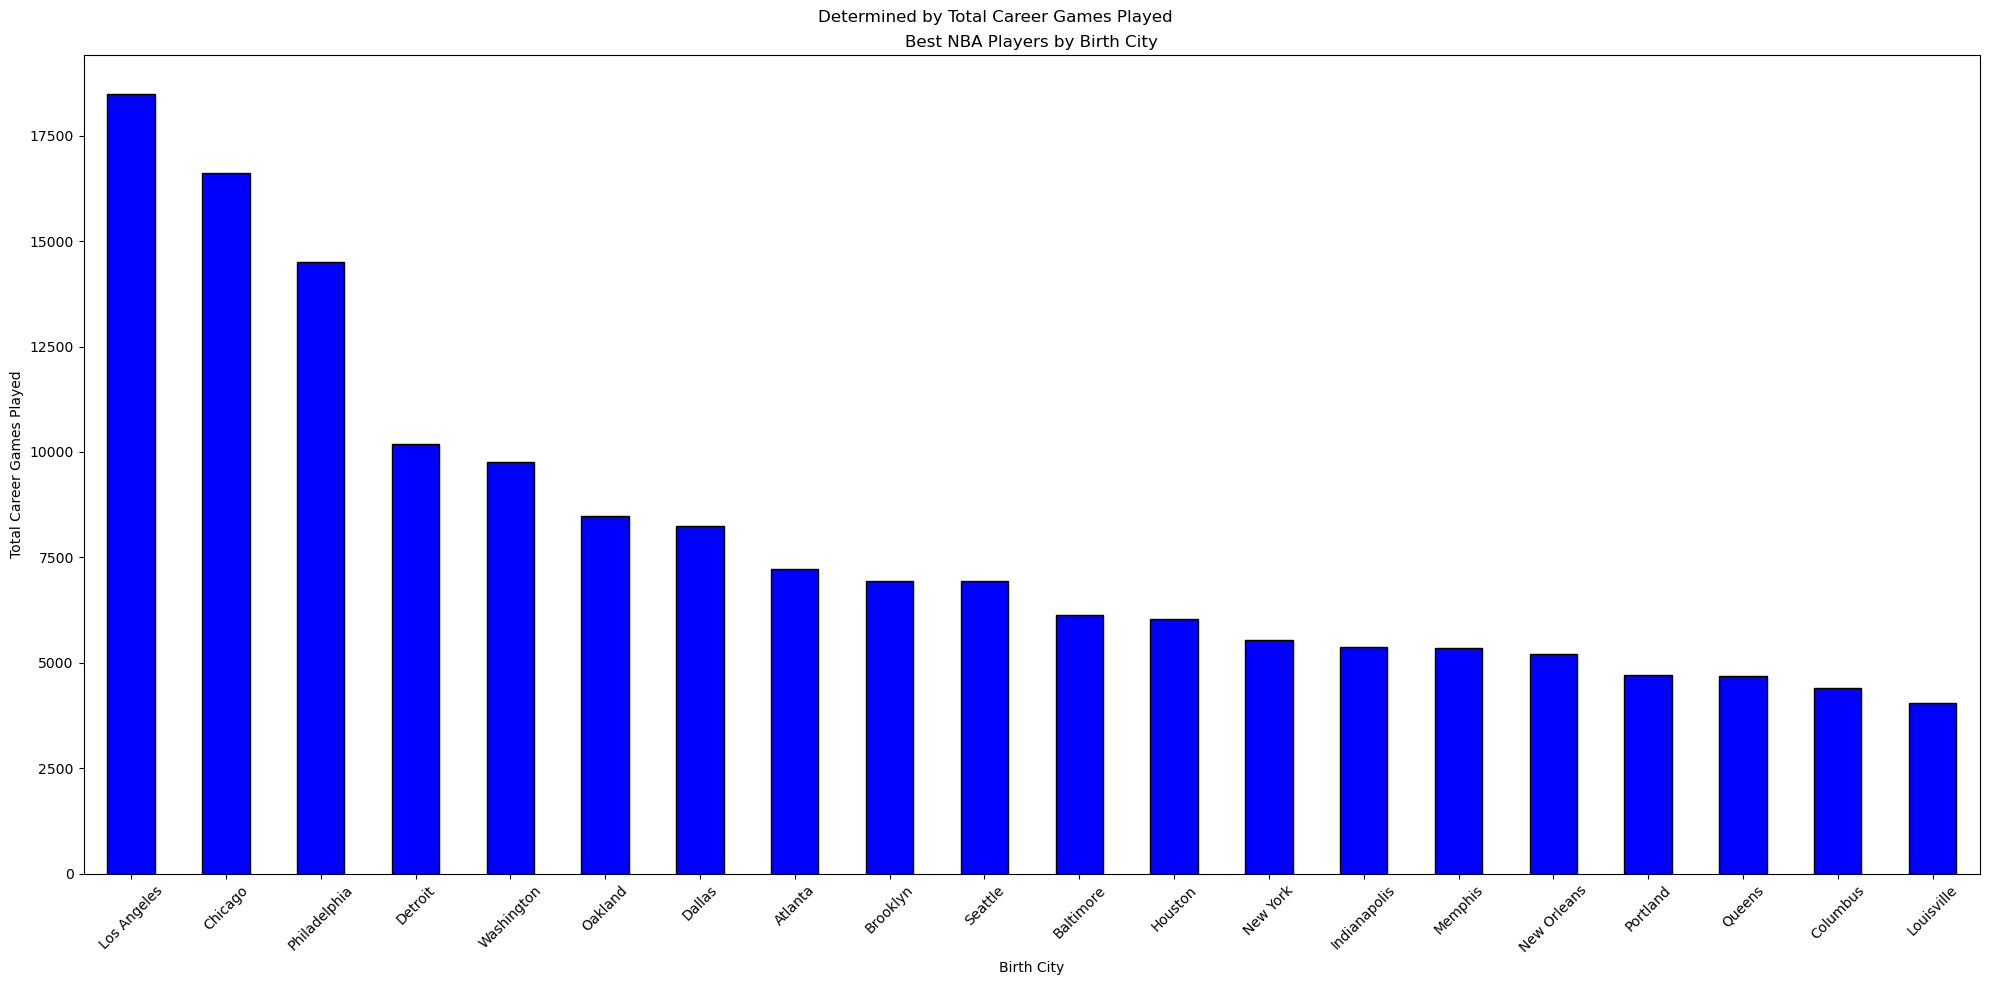

In [26]:
plt.figure(figsize=(20, 10))
total_games_by_city.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Best NBA Players by Birth City')
plt.suptitle('Determined by Total Career Games Played')
plt.xlabel('Birth City')
plt.ylabel('Total Career Games Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()